In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

In [3]:
X = np.load("data.npy")
y = np.load("target.npy")

X = np.array(X/255.0)

In [4]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit(X, y , batch_size=32, epochs=20, callbacks = [checkpoint], validation_split=0.1)

Epoch 1/20
108/108 [==============================] - ETA: 0s - loss: 0.6033 - accuracy: 0.6626WARNING:tensorflow:From C:\Users\alezp\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
108/108 [==============================] - 59s 550ms/step - loss: 0.6033 - accuracy: 0.6626 - val_loss: 0.4603 - val_accuracy: 0.7769
Epoch 2/20
108/108 [==============================] - 51s 472ms/step - loss: 0.4439 - accuracy: 0.7967 - val_loss: 0.3528 - val_accuracy: 0.8504
Epoch 3/20
108/108 [==============================] - 52s 481ms/step - loss: 0.3144 - accura

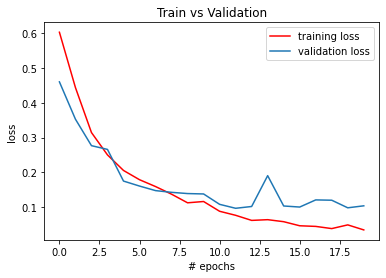

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title("Train vs Validation")
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

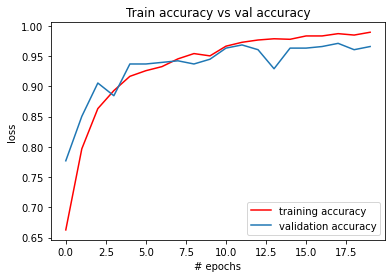

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title("Train accuracy vs val accuracy")
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()